# Phân tích dữ liệu và áp dụng một vài thuật toán

## Các thư viện cần thiết

In [25]:
import numpy as np
import pandas as pd
from ucimlrepo import fetch_ucirepo #load dataset
import matplotlib.pyplot as plt #ve bieu do
import seaborn as sns #ve bieu do

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

## Đọc dữ liệu

In [26]:
# fetch dataset 
air_quality = fetch_ucirepo(id=360) 
  
# data (as pandas dataframes) 
X = air_quality.data.features 
y = air_quality.data.targets 
  
# metadata 
print(air_quality.metadata) 
  
# variable information 
print(air_quality.variables) 


{'uci_id': 360, 'name': 'Air Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/360/air+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/360/data.csv', 'abstract': 'Contains the responses of a gas multisensor device deployed on the field in an Italian city. Hourly responses averages are recorded along with gas concentrations references from a certified analyzer. ', 'area': 'Computer Science', 'tasks': ['Regression'], 'characteristics': ['Multivariate', 'Time-Series'], 'num_instances': 9358, 'num_features': 15, 'feature_types': ['Real'], 'demographics': [], 'target_col': None, 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2008, 'last_updated': 'Sun Mar 10 2024', 'dataset_doi': '10.24432/C59K5F', 'creators': ['Saverio Vito'], 'intro_paper': {'ID': 420, 'type': 'NATIVE', 'title': 'On field calibration of an electronic nose for benzene estimation in an urban pollution monitoring scenario', 'authors': 

## Phân tích dữ liệu

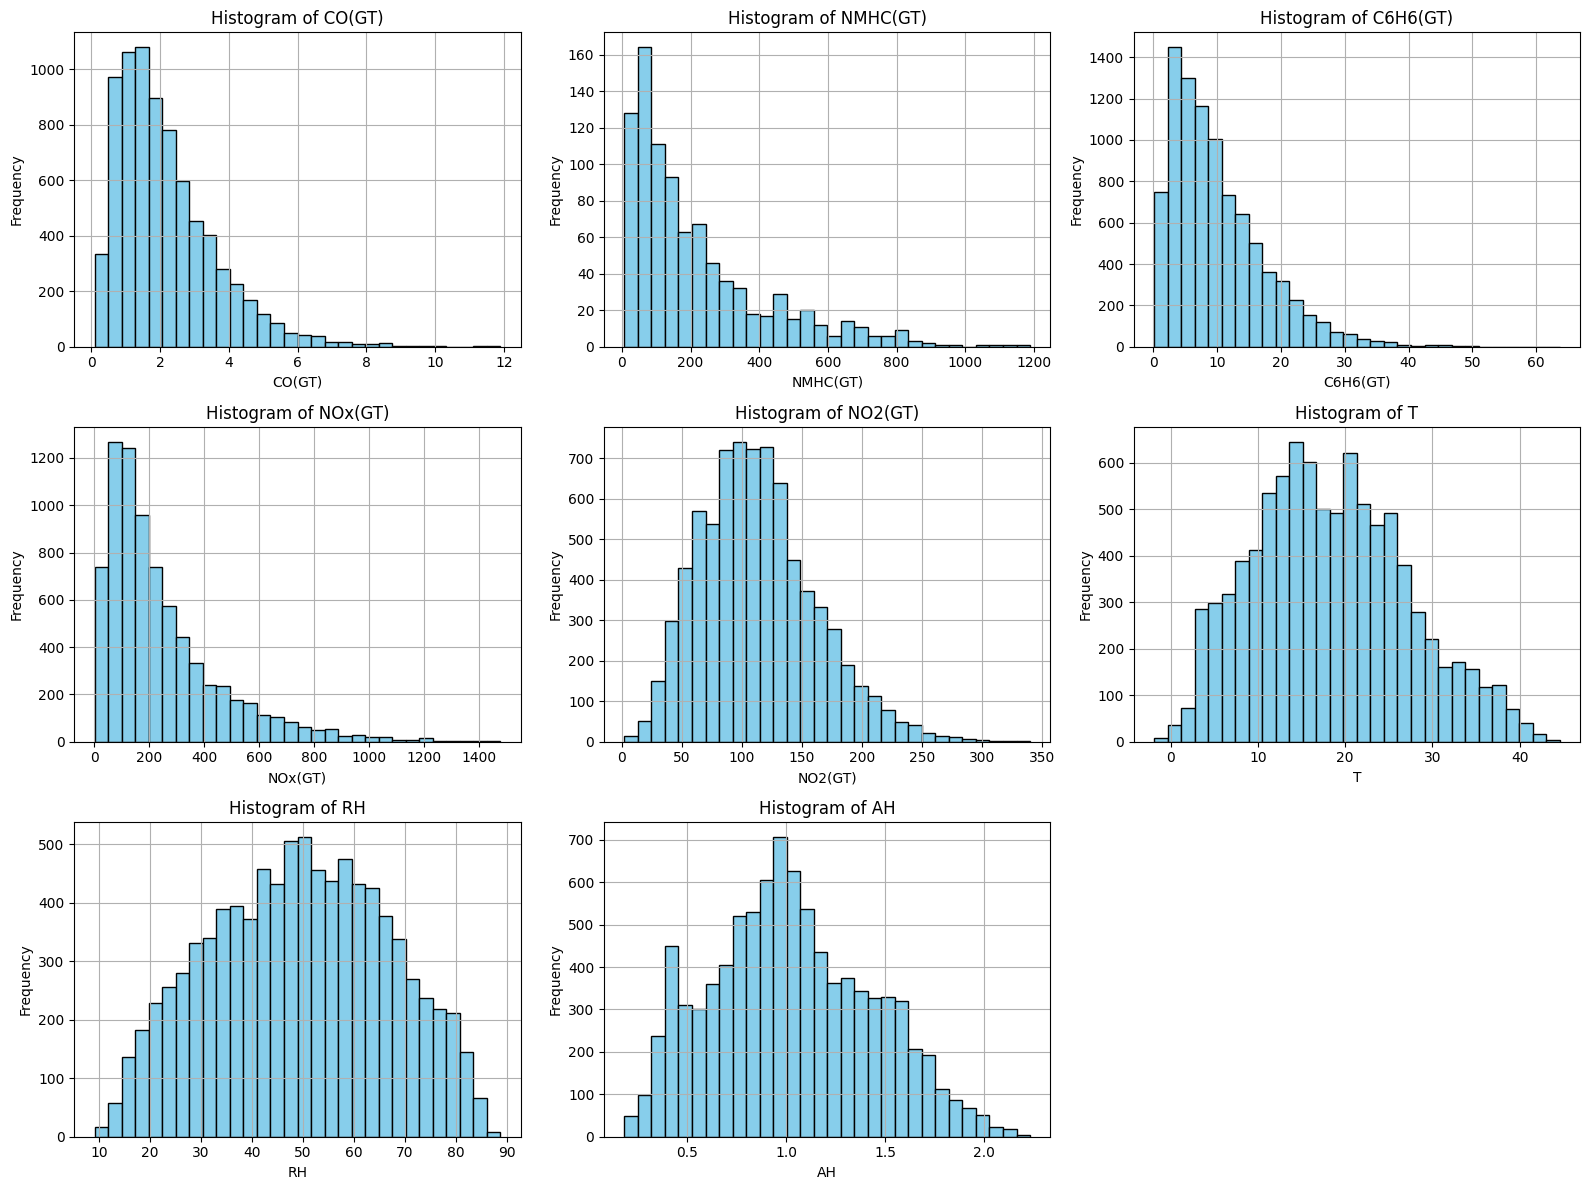

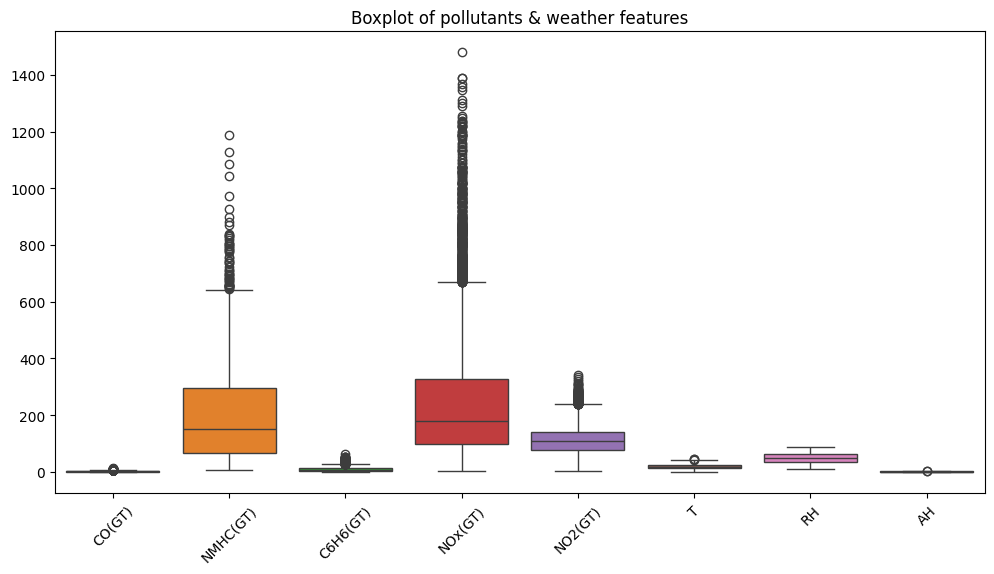

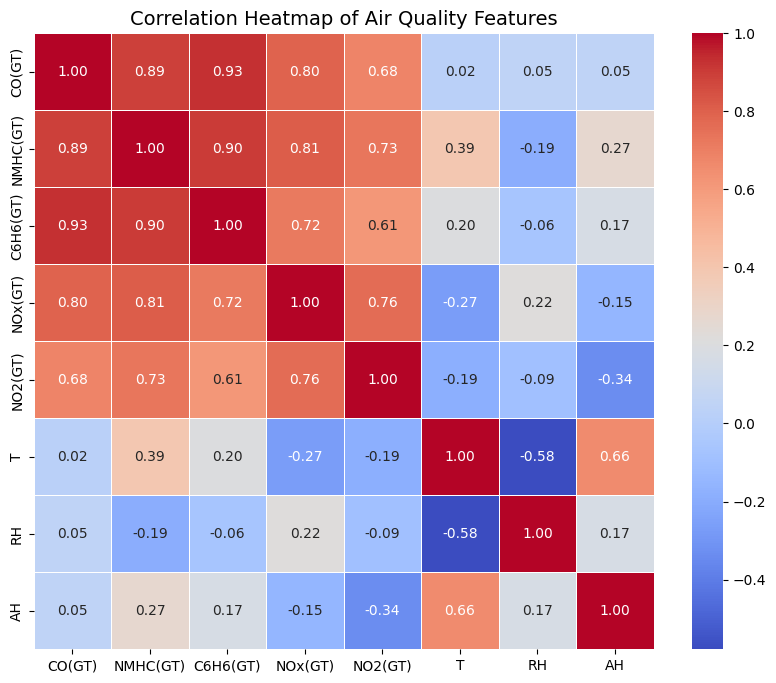

In [27]:
features = ["CO(GT)", "NMHC(GT)", "C6H6(GT)", "NOx(GT)", "NO2(GT)", "T", "RH", "AH"]

#ve bieu do cot
plt.figure(figsize=(16, 12))
for i, col in enumerate(features, 1):
    plt.subplot(3, 3, i)
    X[col].replace(-200, pd.NA).dropna().astype(float).hist(bins=30, color='skyblue', edgecolor='black')
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

#ve bieu do
X_clean = X[features].copy()

# thay -200 thành NaN và ép từng cột sang float
for col in features:
    X_clean[col] = pd.to_numeric(X_clean[col].replace(-200, pd.NA), errors='coerce')

# vẽ boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=X_clean)
plt.xticks(rotation=45)
plt.title("Boxplot of pollutants & weather features")
plt.show()

# tạo bản sao và chuyển về numeric
X_corr = X[features].copy()
for col in features:
    X_corr[col] = pd.to_numeric(X_corr[col].replace(-200, pd.NA), errors='coerce')

# tính ma trận tương quan
corr_matrix = X_corr.corr()

# vẽ heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Air Quality Features", fontsize=14)
plt.show()


## Hồi quy tuyến tính với Target là nồng độ CO

MSE: 0.5787731314769954
R²: 0.6882556760006466


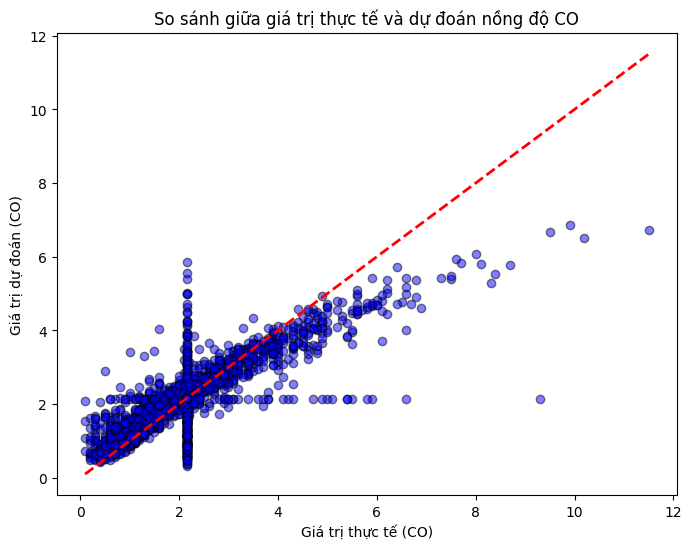

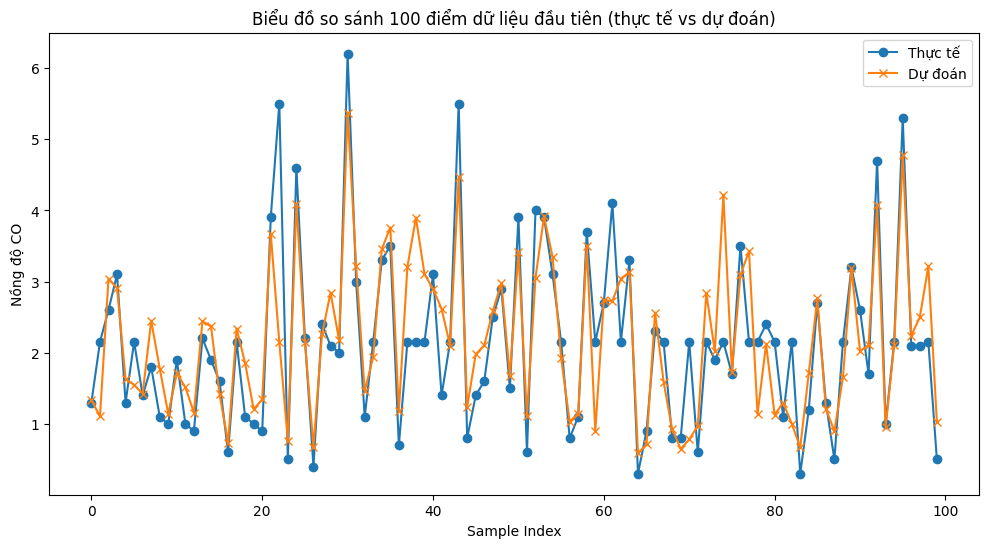

In [28]:
# Features & target
features = ["PT08.S1(CO)", "PT08.S2(NMHC)", "PT08.S3(NOx)", 
            "PT08.S4(NO2)", "PT08.S5(O3)", "T", "RH", "AH"]
target = "CO(GT)"   # nồng độ CO

# Thay -200 bằng NaN (dùng np.nan)
X_clean = X[features].replace(-200, np.nan).astype(float)
y_clean = X[target].replace(-200, np.nan).astype(float)

# Điền missing values bằng trung bình
X_clean = X_clean.fillna(X_clean.mean())
y_clean = y_clean.fillna(y_clean.mean())

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_clean, y_clean, test_size=0.2, random_state=42
)

# Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Dự đoán
y_pred = model.predict(X_test)

# Đánh giá
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

# Vẽ biểu đồ scatter: thực tế vs dự đoán
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5, color="blue", edgecolor="k")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', lw=2)  # đường y=x để so sánh
plt.xlabel("Giá trị thực tế (CO)")
plt.ylabel("Giá trị dự đoán (CO)")
plt.title("So sánh giữa giá trị thực tế và dự đoán nồng độ CO")
plt.show()

# Vẽ thêm biểu đồ đường để xem theo index
plt.figure(figsize=(12,6))
plt.plot(y_test.values[:100], label="Thực tế", marker="o")
plt.plot(y_pred[:100], label="Dự đoán", marker="x")
plt.xlabel("Sample Index")
plt.ylabel("Nồng độ CO")
plt.title("Biểu đồ so sánh 100 điểm dữ liệu đầu tiên (thực tế vs dự đoán)")
plt.legend()
plt.show()